In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)

In [2]:
link='D:\\doc\\data\\train_5.csv'

In [3]:
data=pd.read_csv(link)

In [4]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## ПОДГОТОВКА ДАННЫХ

In [6]:
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

CryoSleep       2.496261
ShoppingMall    2.392730
VIP             2.335212
HomePlanet      2.312205
Name            2.300702
Cabin           2.289198
VRDeck          2.162660
FoodCourt       2.105142
Spa             2.105142
Destination     2.093639
RoomService     2.082135
Age             2.059128
dtype: float64

In [7]:
data = data.dropna(how='any', axis=0)

In [8]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [9]:
num_cols=data.describe().columns

In [10]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [11]:
data[num_cols].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Aliaksandr\AppData\Local\Temp\ipykernel_1356\1886641614.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data[num_cols].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.00,0.07,0.14,0.04,0.12,0.11
RoomService,0.07,1.00,-0.01,0.06,0.01,-0.03
FoodCourt,0.14,-0.01,1.00,-0.01,0.22,0.22
ShoppingMall,0.04,0.06,-0.01,1.00,0.02,0.00
Spa,0.12,0.01,0.22,0.02,1.00,0.15
VRDeck,0.11,-0.03,0.22,0.00,0.15,1.00


In [12]:
cat_cols=list(set(data.columns)-set(num_cols))

In [13]:
cat_cols=list(set(cat_cols)-set(['Name', 'PassengerId', 'Cabin', 'Transported']))

In [14]:
target='Transported'

In [15]:
cols=list(num_cols)+cat_cols+[target]

In [16]:
data=data[cols]

In [17]:
data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP,HomePlanet,Destination,CryoSleep,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,False,Europa,TRAPPIST-1e,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,False,Earth,TRAPPIST-1e,False,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,True,Europa,TRAPPIST-1e,False,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,Europa,TRAPPIST-1e,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,False,Earth,TRAPPIST-1e,False,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,True,Europa,55 Cancri e,False,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,Earth,PSO J318.5-22,True,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,False,Earth,TRAPPIST-1e,False,True
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,Europa,55 Cancri e,False,False


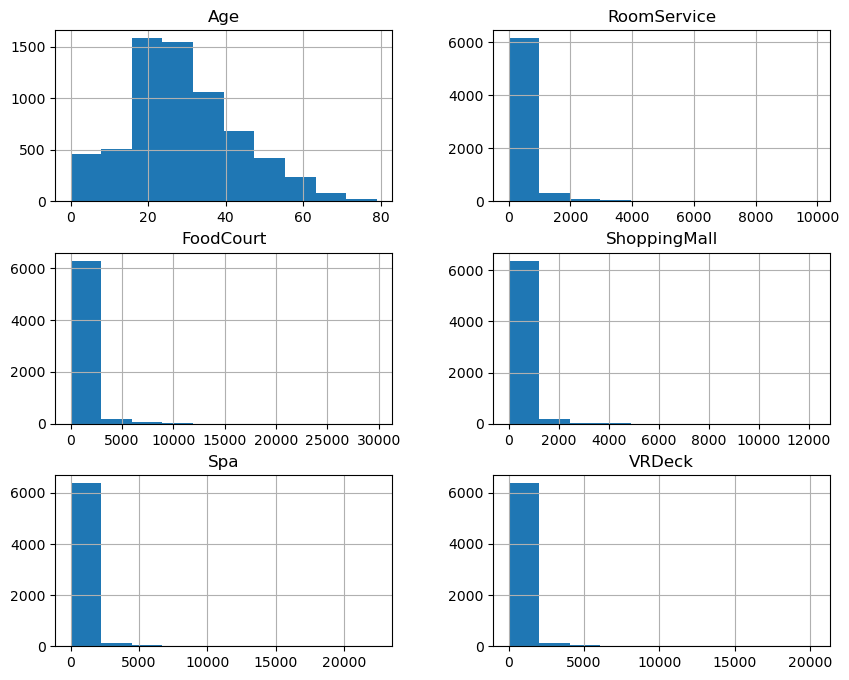

In [18]:
data.hist(column=list(num_cols)+cat_cols+[target], figsize=(10, 8))
None

In [19]:
data[cat_cols+[target]].describe()

,VIP,HomePlanet,Destination,CryoSleep,Transported
count,6606,6606,6606,6606,6606
unique,2,3,3,2,2
top,False,Earth,TRAPPIST-1e,False,True
freq,6444,3566,4576,4274,3327


In [20]:
vok_replace={'CryoSleep':{False: 0, True: 1}, 
             'Transported':{False: 0, True: 1}, 
             'VIP':{False: 0, True: 1}, 
             'HomePlanet':{'Europa': 0, 'Earth': 1, 'Mars': 2}, 
             'Destination':{'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}, 
             'Transported':{False: 0, True: 1}}

In [21]:
data = data.replace(vok_replace)

In [34]:
X=data.drop(['Transported'], axis=1)
y=data["Transported"]

In [35]:
X=data.drop(['Transported'], axis=1).values


# Разбиение и обучение 

Разобьём данные на обучающую и тестовую выборки:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [37]:
itog=[]
for i in range(2,20):
    decision_tree = DecisionTreeClassifier(max_depth = i)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    itog.append([accuracy_score(y_test, y_pred),f1_score(y_test, y_pred)])
    print(i, [accuracy_score(y_test, y_pred),f1_score(y_test, y_pred)])
    


2 [0.7391041162227603, 0.7280757097791799]
3 [0.7693704600484261, 0.7661141804788214]
4 [0.7760290556900726, 0.791196388261851]
5 [0.7808716707021792, 0.794084186575654]
6 [0.7808716707021792, 0.794084186575654]
7 [0.7796610169491526, 0.7820359281437126]
8 [0.7905569007263923, 0.7981330221703618]
9 [0.7875302663438256, 0.792920353982301]
10 [0.7832929782082324, 0.7886658795749705]
11 [0.7742130750605327, 0.7832655432887855]
12 [0.7760290556900726, 0.782608695652174]
13 [0.7584745762711864, 0.763765541740675]
14 [0.7602905569007264, 0.7665094339622641]
15 [0.7530266343825666, 0.7551020408163266]
16 [0.7627118644067796, 0.7669441141498217]
17 [0.7566585956416465, 0.762130177514793]
18 [0.7602905569007264, 0.7645659928656362]
19 [0.7548426150121066, 0.7610619469026549]


In [38]:
itog=[]
for i in range(2,20):
    decision_tree = RandomForestClassifier(max_depth = i)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    itog.append([accuracy_score(y_test, y_pred),f1_score(y_test, y_pred)])
    print(i, [accuracy_score(y_test, y_pred),f1_score(y_test, y_pred)])
    


2 [0.7409200968523002, 0.7227979274611399]
3 [0.7560532687651331, 0.7454200884396716]
4 [0.784503631961259, 0.7821297429620563]
5 [0.7875302663438256, 0.7938931297709924]
6 [0.7929782082324455, 0.7997658079625293]
7 [0.7966101694915254, 0.8060046189376443]
8 [0.7984261501210653, 0.8096054888507719]
9 [0.7966101694915254, 0.808]
10 [0.799636803874092, 0.8090017311021349]
11 [0.7941888619854721, 0.8016336056009333]
12 [0.7953995157384988, 0.8037166085946573]
13 [0.7960048426150121, 0.8023460410557184]
14 [0.7905569007263923, 0.7955082742316785]
15 [0.7911622276029056, 0.7947650208209399]
16 [0.7887409200968523, 0.7921381774865991]
17 [0.788135593220339, 0.7906698564593301]
18 [0.788135593220339, 0.7909199522102748]
19 [0.7832929782082324, 0.7866507747318235]


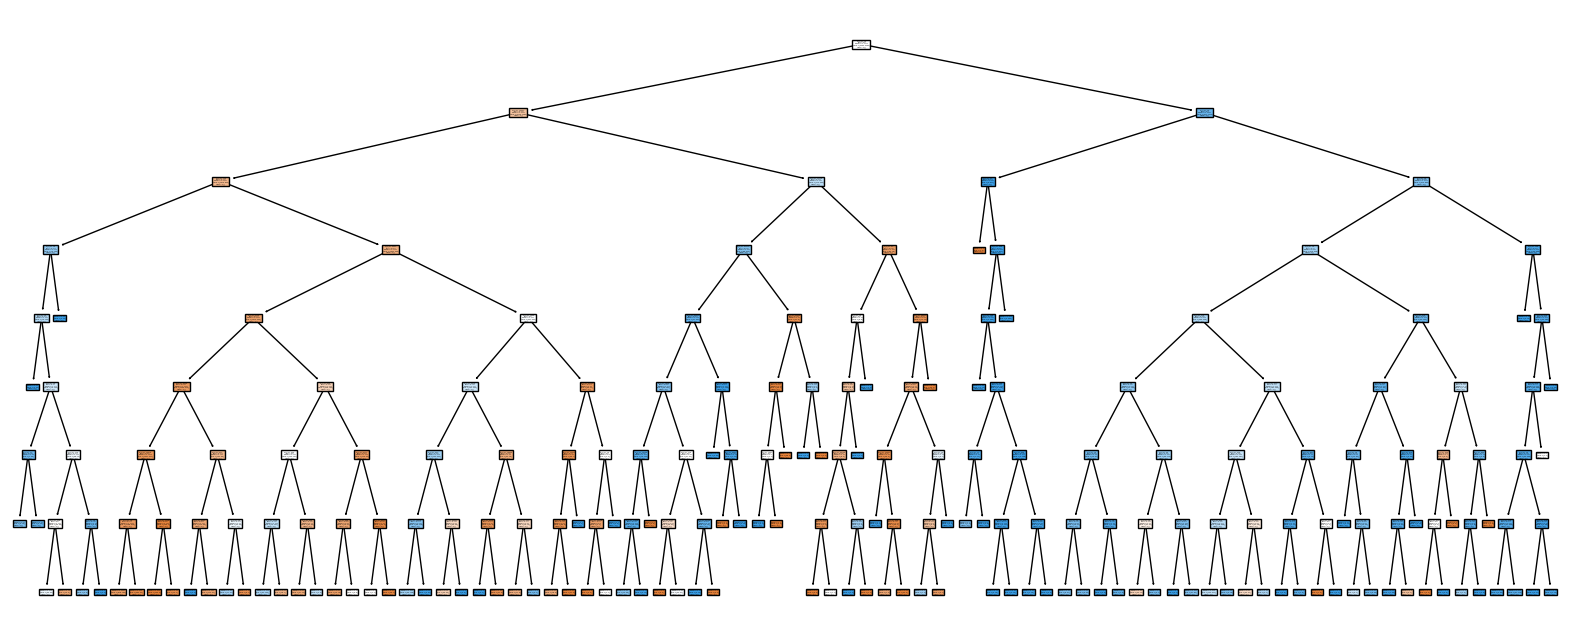

In [39]:
decision_tree = DecisionTreeClassifier(max_depth = 8)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

plt.figure(figsize=(20, 8))
tr = tree.plot_tree(decision_tree, class_names=True, filled=True)

In [40]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.7917675544794189
Precision: 0.7786606129398411
Recall: 0.8215568862275449
F1 score: 0.7995337995337995


In [41]:
from sklearn.model_selection import KFold

In [42]:
kf = KFold(n_splits=5)

In [43]:
model = DecisionTreeClassifier(max_depth = 8)

In [44]:
metrics = []
for train_ind, test_ind in kf.split(X_train):
    model.fit(X_train[train_ind], y_train.values[train_ind])
    pred = model.predict(X_train[test_ind])
    metrics.append(f1_score(y_train.values[test_ind], pred))

In [45]:
metrics

[0.7861811391223156,
 0.7812798471824262,
 0.8010999083409716,
 0.794688457609806,
 0.7894736842105263]

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
clf = RandomForestClassifier()

In [48]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [49]:
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

In [ ]:
clf =  DecisionTreeClassifier()

In [ ]:
parametrs = { 'max_depth': range (1,13, 1),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [ ]:
grid1 = GridSearchCV(clf, parametrs, cv=5)
grid1.fit(X_train, y_train)

In [ ]:
print(grid1.best_params_)
print(grid1.best_score_)
print(grid1.best_estimator_)